## 1. Importing the transaction data
<p>Banks process millions of transactions per day and it is important that they are able to recognize fraudulent transactions to protect their customers. Transaction fraud occurs when account information or credit card details are stolen and used to make an unauthorized transaction. Manually checking each transaction would be virtually impossible, so many commercial banks, including Chase, have adopted machine learning techniques to automatically predict whether there is fraudulent activity in each translation.</p>
<p>The dataset, generated by a payment simulator, represents transactions between different customers and their counterparties. It includes regular monthly payments (e.g. utility bills, landlord) as well as non-regular payments (e.g. cash withdrawals, currency exchange, wires). The simulator generates three kinds of fraudulent transactions: when the fraudster convinces the client to pay to a different account; when the fraudster controls the client's account and makes several payments from it; and when the fraudster controls the client's account and makes a transaction with a big amount. The labels don’t indicate what type of fraudulent behavior was used to generate that particular transaction.</p>

In [28]:
# Import pandas with the usual alias
import pandas as pd

# Read in the data from datasets/paymentfraud.csv
fraud_df = pd.read_csv("datasets/paymentfraud.csv")

# See the results
fraud_df

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,...,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2021-10-25 00:13:24,PAYMENT-54496,CLIENT-54373,ACCOUNT-54383,United States,...,ACCOUNT-54498,COCOS-KEELING-IS,$34.4,0,MAKE-PAYMENT
1,2021-03-17 15:13:17,QUICK-PAYMENT-7963,CLIENT-7872,ACCOUNT-7887,United States,...,ACCOUNT-7883,COMOROS,$100.71,0,QUICK-PAYMENT
2,2021-12-11 20:03:26,MAKE-PAYMENT-69791,CLIENT-69732,ACCOUNT-69744,United States,...,ACCOUNT-69750,USA,$549.74,0,MAKE-PAYMENT
3,2022-06-25 16:43:32,PAYMENT-108077,CLIENT-107934,ACCOUNT-108017,UZBEKISTAN,...,ACCOUNT-108079,KAZAKHSTAN,$87.29,0,MAKE-PAYMENT
4,2021-02-11 18:43:16,QUICK-PAYMENT-4173,CLIENT-4117,ACCOUNT-4118,United States,...,ACCOUNT-4109,USA,$984.36,0,QUICK-PAYMENT
...,...,...,...,...,...,...,...,...,...,...,...
14581,2021-07-12 02:53:21,PAYMENT-33773,CLIENT-33704,ACCOUNT-33714,United States,...,ACCOUNT-33775,SAINT-BARTHELEMY,$74.99,0,MAKE-PAYMENT
14582,2021-04-01 05:13:17,PAYMENT-10387,CLIENT-10237,ACCOUNT-10247,United States,...,ACCOUNT-10389,USA,$82.42,0,MAKE-PAYMENT
14583,2021-04-11 05:33:18,MOVE-FUNDS-17492,COMPANY-17463,ACCOUNT-17470,GERMANY,...,ACCOUNT-17469,USA,$2000.18,0,MOVE-FUNDS
14584,2022-08-05 10:23:34,MOVE-FUNDS-122911,CLIENT-122880,ACCOUNT-122891,United States,...,ACCOUNT-122894,CANADA,$806.51,0,MOVE-FUNDS


## 2. Exploring the fraud dataset
<p>Now you have imported the dataset, it's time to explore it. Each row in the dataset represents one payment transaction. It has the following columns: </p>
<ul>
<li><code>Time_step</code>: Date and time when the transaction occured. </li>
<li><code>Transaction_Id</code>: Unique identifier for the transaction.</li>
<li><code>Sender_Id</code>: Unique identifier for the sender (origin) of the payment.</li>
<li><code>Sender_Account</code>: Unique identifier for the account number of the sender.</li>
<li><code>Sender_Country</code>: Country of the sender.</li>
<li><code>Sender_Sector</code>: Client sector for the sender.</li>
<li><code>Sender_lob</code>: The line of business of the client.</li>
<li><code>Bene_Id</code>:  Unique identifier for the beneficiary (receiver) of the payment.</li>
<li><code>Bene_Account</code>: Unique identifier for the account number of the beneficiary.</li>
<li><code>Bene_Country</code>: Country of the beneficiary.</li>
<li><code>USD_amount</code>: Amount of money transacted, in USD.</li>
<li><code>Label</code>: 0 if the transaction was not labeled as fraudulent; 1 if it was.</li>
<li><code>Transaction_Type</code>: Quick deposit, deposit check, pay check, quick payment, cash deposit, cash withdrawal, currency exchange, transfer (wire), payment (e.g. utility bills).</li>
</ul>
<p>Some useful first questions to ask about the dataset are</p>
<ul>
<li>What are the types of data in each column?</li>
<li>How many missing values are there?</li>
<li>What proportion of transactions were labeled as fraudulent?</li>
</ul>

In [3]:
# Print dataset column information for fraud_df
print(fraud_df.info())

# Print the number of missing values in each column
print(fraud_df.isna().sum())

# Calculate the proportion of payments labeled as fraudulent
#prop_payments_labeled_fraudulent = 2%fraud_df
prop_payments_labeled_fraudulent = fraud_df["Label"].mean()
print(prop_payments_labeled_fraudulent)

# See the results
# 2% is provided by the question itself
print(f"Proportion payments labeled as fraudulent: {prop_payments_labeled_fraudulent:.2%}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586 entries, 0 to 14585
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time_step                    14586 non-null  object 
 1   Transaction_Id               14586 non-null  object 
 2   Sender_Id                    14586 non-null  object 
 3   Sender_Account               14586 non-null  object 
 4   Sender_Country               14586 non-null  object 
 5   Sender_Sector                14586 non-null  float64
 6   Sender_lob                   14586 non-null  object 
 7   Sender_Registration_Country  14586 non-null  object 
 8   Bene_Id                      14586 non-null  object 
 9   Bene_Account                 14586 non-null  object 
 10  Bene_Country                 14586 non-null  object 
 11  USD_amount                   14586 non-null  object 
 12  Label                        14586 non-null  int64  
 13  Transaction_Type

## 3. Cleaning the dataset
<p>Notice that the <code>USD_amount</code> has type <code>object</code> - that is that it is a text column rather than a numeric column. This is because each number has a prefix of <code>$</code>. We need to fix this in order to make calculations on that column.</p>
<p>Additionally, only about 2% of the payments were labeled as fraudulent, which means that the dataset is <strong>imbalanced</strong>. This has implications for modeling later.</p>
<p>You may also have noticed in the first task that the countries are specified differently for sender and benefactor. In <code>Sender_Country</code>, the United States of America is written as <code>United States</code>, but in <code>Bene_Country</code> it is written as <code>USA</code>.</p>
<p>For now, let's deal with the <code>USD_amount</code> and <code>Sender_Country</code> columns.</p>

In [4]:
#Checking the data type of the USD_amount
fraud_df.USD_amount.dtype


dtype('O')

In [5]:
#'b'       boolean
#'i'       (signed) integer
#'u'       unsigned integer
#'f'       floating-point
#'c'       complex-floating point
#'O'       (Python) objects
#'S', 'a'  (byte-)string
#'U'       Unicode
#'V'       raw data (void)

#dtype('0') is a python object

In [6]:
# In USD_amount, strip the "$" and convert to type float
#fraud_df["USD_amount_num"] = ....
#Stripping the $ symbol and replacing the "United States" with "USA"
fraud_df["USD_amount_num"] = fraud_df["USD_amount"].str.strip("$").astype(float)

fraud_df["Sender_Country"] = fraud_df["Sender_Country"].replace({"United States","USA"})


# See the updated columns
print(fraud_df[["USD_amount_num", "Sender_Country"]])

       USD_amount_num Sender_Country
0               34.40  United States
1              100.71  United States
2              549.74  United States
3               87.29     UZBEKISTAN
4              984.36  United States
...               ...            ...
14581           74.99  United States
14582           82.42  United States
14583         2000.18        GERMANY
14584          806.51  United States
14585          333.88  United States

[14586 rows x 2 columns]


## 4. Feature engineering: international payments
<p>Some of the columns in the dataset require some processing to become useful feature in the model. For example, just knowing the sender country or the benefactor country is unlikely to be highly informative for the model, but knowing if a payment was made domestically or internationally (the sender country is the same/different to the benefactor country) is likely to be informative.</p>

In [7]:
# Add a column for domestic payments
fraud_df["is_domestic"] = fraud_df["Sender_Country"] == fraud_df["Bene_Country"]

# Calculate the proportion of domestic payments
prop_is_domestic = fraud_df["is_domestic"].mean()

# See the result
print(f"The proportion of domestic transactions is {prop_is_domestic:.2%}.")

The proportion of domestic transactions is 0.04%.


## 5. Feature engineering: transaction times
<p>The timestamps for the transactions are hard to reason about, but fraud may be more likely at different times of the month, or at different times of the day, so extracting these components from the timestamps can result in more useful features.</p>

In [8]:
# Convert Time_step to datetime
fraud_df['Time_step'] = pd.to_datetime(fraud_df['Time_step'])



# Extract the day of month from Time_step
fraud_df['day'] = fraud_df['Time_step'].dt.day

# Extract the hour of day from Time_step
fraud_df['hour'] = fraud_df['Time_step'].dt.hour

# See the time columns

fraud_df[["Time_step", "day", "hour"]]

,Time_step,day,hour
0,2021-10-25 00:13:24,25,0
1,2021-03-17 15:13:17,17,15
2,2021-12-11 20:03:26,11,20
3,2022-06-25 16:43:32,25,16
4,2021-02-11 18:43:16,11,18
...,...,...,...
14581,2021-07-12 02:53:21,12,2
14582,2021-04-01 05:13:17,1,5
14583,2021-04-11 05:33:18,11,5
14584,2022-08-05 10:23:34,5,10


## 6. Feature engineering: whole number transactions
<p>If payment amounts were chosen randomly, you'd expect that 1% of them would be whole numbers, since there are 100 cents in a US dollar. However, fraudulent payments aren't generated randomly - they generated by schemes designed by humans, so we might be able to detect a difference in how many payment amounts are whole dollar numbers. This is a potentially interesting feature.</p>

In [9]:
# Add a column of whether the USD amount is an integer
fraud_df["is_integer_USD_amount"] = fraud_df['USD_amount_num'] == fraud_df['USD_amount_num'].astype(int)

# Group by Label and calculate the proportion of transactions where is_integer_USD_amount is true
prop_is_integer_USD_amount = fraud_df.groupby('Label')['is_integer_USD_amount'].mean()




# See the result
print(f"The percentage of integer-valued transaction amounts is:\n- {prop_is_integer_USD_amount[0]:.2%} for non-fraudulent payments.\n- {prop_is_integer_USD_amount[1]:.2%} for fraudulent payments.")

The percentage of integer-valued transaction amounts is:
- 1.04% for non-fraudulent payments.
- 0.31% for fraudulent payments.


## 7. Split the data to avoid leakage
<p>The history of the sender's account could be useful for predicting future fraud. For example, fraudulent transactions may be more common on very new or very old accounts, so the number of transactions per account may be a useful feature. </p>
<p>Likewise, if a sender has had repeatedly transactions labeled as fraudulent before, they may be more likely to commit fraud than those that have never been flagged, so the proportion of fraudulent transactions is another potentially useful feature.</p>
<p>Note that in creating such features, we would be using information from the target variable <code>'Label'</code>. Therefore, we first should split the data into training and testing sets before creating these features, otherwise any model we build would overestimate performance.</p>

In [10]:
# Import train_test_split() from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Get the response variable
response = fraud_df["Label"]

# Get all the other columns as features
features = fraud_df.drop("Label", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    response, 
    test_size=0.3,
    random_state=1
)

## 8. Feature engineering: sender history
<p>Having split the data, we can now go ahead and create new features that use the <code>'Label'</code> column.</p>
<p>In particular, we will create one feature that encodes the number of transactions per account, and another that encodes the proportion of fraudulent transactions per account.</p>
<p>It seems reasonable to assume that if a sender has had previous transactions labeled as fraudulent, they may be more likely to commit fraud, and also, that fraudulent transactions may be more common on very new or very old accounts.</p>

In [11]:
# Add Label to X_test and X_train
# Don't forget to drop before modeling
#The below step is done to make X_test and X_train to make it with the 'label' column.
X_test["Label"] = y_test
X_train["Label"] = y_train

# Group X_train by Sender_Id, select the Label
label_by_sender_id_test = X_test.groupby('Sender_Id')['Label']

# Group X_train by Sender_Id, select the Label
label_by_sender_id_train = X_train.groupby('Sender_Id')['Label']



# Transform to add column of counts of fraud payments
X_test["n_Transactions_by_Sender_Id"] = label_by_sender_id_test.transform('size')


X_train["n_Transactions_by_Sender_Id"] = label_by_sender_id_train.transform('size')

# Transform to add column of proportions of fraud payments
X_test["prop_Fraud_by_Sender_Id"] = label_by_sender_id_test.transform('mean')


X_train["prop_Fraud_by_Sender_Id"] = label_by_sender_id_train.transform('mean') 


# See the result
X_test[["Sender_Id", "n_Transactions_by_Sender_Id", "prop_Fraud_by_Sender_Id"]]
#X_train[["Sender_Id", "n_Transactions_by_Sender_Id", "prop_Fraud_by_Sender_Id"]]

,Sender_Id,n_Transactions_by_Sender_Id,prop_Fraud_by_Sender_Id
11488,CLIENT-120116,3,0.000
11162,CLIENT-28083,9,0.111
11155,CLIENT-103116,6,0.000
857,CLIENT-93541,3,0.000
3191,CLIENT-89799,2,0.000
...,...,...,...
9269,CLIENT-102632,2,0.000
11429,CLIENT-48468,4,0.000
4473,CLIENT-80709,6,0.000
12653,CLIENT-48313,6,0.000


## 9. Feature engineering: fraud in the sender country
<p>Some countries have a bad reputation for fraud. That means that the level of fraud in the country where the transaction originates could be a useful feature.</p>
<p>More specifically, we can use the proportion of transactions that are fraudulent for each country.</p>
<p>Let's add this feature to the data before we build our model.</p>

In [12]:
# Transform to add column of proportions of fraud payments
X_test["prop_Fraud_by_Sender_Country"] = X_test.groupby("Sender_Country")["Label"].transform('mean')

X_train["prop_Fraud_by_Sender_Country"] = X_train.groupby("Sender_Country")["Label"].transform('mean')

# Drop label in preparation for modeling
X_test = X_test.drop("Label", axis=1)
X_train = X_train.drop("Label", axis=1)

# See the result
X_train[["Sender_Country", "prop_Fraud_by_Sender_Country"]]

,Sender_Country,prop_Fraud_by_Sender_Country
238,United States,0.024
4221,United States,0.024
9937,United States,0.024
7687,United States,0.024
10372,United States,0.024
...,...,...
905,United States,0.024
5192,CANADA,0.037
12172,United States,0.024
235,CANADA,0.037


## 10. Building a decision tree classifier
<p>Now that we've explored the data and added some (hopefully useful!) new features, let's build a model. Since we are trying to predict the binary variable of whether a transaction is fraudulent or not, we will use a classification model. We will first use a Decision Tree to classify transactions. Decision Trees are popular models in classification and can be easily interpreted, are quick to build, and will naturally exclude unimportant features.</p>
<p>When working with classification problems, AUC, accuracy, precision and recall are commonly used evaluation metrics in a model's performance. We will use these to evaluate our Decision Tree model's performance, and later apply our knowledge to a Random Forest classifier.</p>
<ul>
<li>Accuracy: Out of all the cases, how many did we get correct?</li>
<li>Precision: Of the cases we labeled as fraud, how many are truly fraudulent?</li>
<li>Recall: How many truly fraudulent cases are we labeling as fraud?</li>
</ul>
<p>AUC - ROC curve is a very common performance measurement for the classification problems at various probability threshold settings. ROC is a probability curve (True Positive Rate vs False Positive Rate) and AUC represents the degree or measure of separability. Therefore, the higher the AUC, the better the model is at distinguishing whether a case a fraudulent or not.</p>
<ul>
<li>False Positive Rate (FPR) = FP / (TN + FP)</li>
<li>True Positive Rate (TPR) = TP / (FN + TP)</li>
</ul>
<p>Here, we're going to use sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html"><code>RocCurveDisplay</code></a> function to create an ROC Curve, and the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report</code></a> function to create a report listing each of the above classification metrics.</p>

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}
Best CV accuracy = 0.9772771792360431
Test set accuracy of best model: 0.979
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4282
           1       0.00      0.00      0.00        94

    accuracy                           0.98      4376
   macro avg       0.49      0.50      0.49      4376
weighted avg       0.96      0.98      0.97      4376



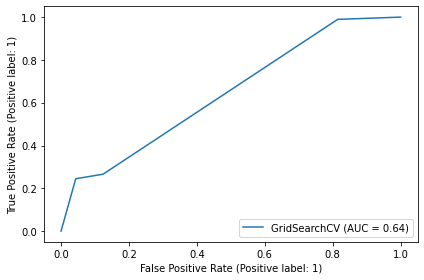

In [13]:
# Import DecisionTreeClassifier() and GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Select features to use in model
features_list = ['Sender_Sector', 'USD_amount_num', 'is_domestic', 'day', 'hour', 'n_Transactions_by_Sender_Id',
                 'is_integer_USD_amount', 'prop_Fraud_by_Sender_Country']
X_test = X_test[features_list]
X_train = X_train[features_list]

# Create a decision tree classifier object
dt = DecisionTreeClassifier(random_state=1)

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4, 5],
             'min_samples_leaf': [0.04, 0.06],
             'max_features': [0.2, 0.4, 0.6]}

# Instantiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=5)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy = ' + str(best_CV_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))

# Plot AUC curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(grid_dt, X_test, y_test)

plt.show()

In [14]:
%%nose 

import pandas as pd

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()

correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

correct_X_test["Label"] = correct_y_test
correct_X_train["Label"] = correct_y_train

correct_label_by_sender_id_test = correct_X_test \
    .groupby("Sender_Id") \
    ["Label"]

correct_label_by_sender_id_train = correct_X_train \
    .groupby("Sender_Id") \
    ["Label"]

correct_X_test["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('size')

correct_X_train["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('size')

correct_X_test["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('mean')

correct_X_test["prop_Fraud_by_Sender_Country"] = correct_X_test \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Country"] = correct_X_train \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

#correct_X_test = correct_X_test.drop("Label", axis=1)
#correct_X_train = correct_X_train.drop("Label", axis=1)

#correct_dt = DecisionTreeClassifier(random_state=1)
#correct_grid_dt = GridSearchCV(estimator=correct_dt, param_grid=params_dt, scoring='accuracy', cv=5)
#correct_grid_dt.fit(correct_X_train, correct_y_train)
#correct_y_pred = correct_dt.predict(correct_X_test)

def test_dt_exists():
    assert 'dt' in globals(), \
    "You need to create the `dt` variable."

def test_dt_is_a_decision_tree_classifier():
    assert str(type(dt))  == "<class 'sklearn.tree._classes.DecisionTreeClassifier'>", \
    "`dt` should be a scikit-learn `DecisionTreeClassifier`."

def test_dt_random_state():
    assert dt.random_state == 1, \
    "The random state of `dt` is incorrect. Did you set it to `1`?"

def test_grid_dt_exists():
    assert 'grid_dt' in globals(), \
    "You need to create the `grid_dt` variable."

def test_best_hyperparams_exists():
    assert 'best_hyperparams' in globals(), \
    "You need to create the `best_hyperparams` variable."

def test_best_CV_score_exists():
    assert 'best_CV_score' in globals(), \
    "You need to create the `best_CV_score` variable."

def test_best_model_exists():
    assert 'grid_dt' in globals(), \
    "You need to create the `best_model` variable."

def test_test_acc_exists():
    assert 'test_acc' in globals(), \
    "You need to create the `test_acc` variable."

8/8 tests passed


## 11. Trying a different algorithm
<p>A few observations:</p>
<ul>
<li>Notice our accuracy is 98%, which might seem great, but remember our dataset is highly imbalanced with only about 2% of the cases labeled as fraud. In theory, if we built a model that guessed "not fraud" for each observation, we would achieve 98% accuracy. Given this, accuracy is not a great metric compared to others like precision, recall, and F-1 score.</li>
<li>In the ROC curve, we can see our model performs slightly better than a No-Skill model (one that guesses randomly and would have a diagonal line in the plot). However, the curve is relatively flat, and we should be able to improve the model further.</li>
</ul>
<p>How can we improve the model from here? Adding additional features is one option.</p>
<p>Another option is to tune the model further, or try another model altogether. Let's try a different model.</p>
<p>Perhaps the decision tree is too simple and a different classification algorithm such as a Random Forest might perform better?</p>
<p>A Random Forest is a tree-based algorithm that will leverage multiple decision trees to arrive it its decision. The model will generate a large number of individual, randomly created decision trees. Each decision tree will generate a class prediction, and the Random Forest will select the most frequent prediction as its final output. This approach relates to the "Wisdom of the Crowd", which is an interesting theory assuming large crowds will cumulatively make smarter decisions than individual experts. This theory can be applied to a range of interesting cases!</p>
<p>Random forests are more computationally intensive than decision trees. Since GridSearchCV can also be computationally intensive, we'll use RandomizedSearchCV instead here to reduce runtimes. RandomizedSearchCV consists of randomly selecting from all hyperparameter values from the list of possible ranges. In comparison, GridSearchCV tests each possible combination of hyperparamater values - with the drawback being that any additional parameter added for testing will grow the training time exponentially.</p>

Best hyperparameters:
 {'n_estimators': 10, 'min_samples_leaf': 20, 'max_features': 'log2'}
Best CV accuracy = 0.7267273883329205
Test set accuracy of best model: 0.979
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4282
           1       0.00      0.00      0.00        94

    accuracy                           0.98      4376
   macro avg       0.49      0.50      0.49      4376
weighted avg       0.96      0.98      0.97      4376



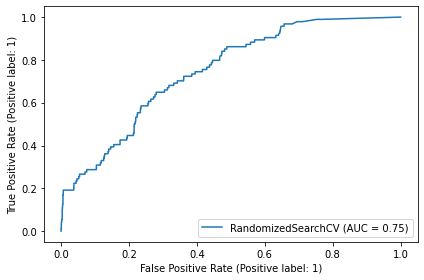

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

# Create a random forest classifier object
rf = RandomForestClassifier(random_state = 1)

# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators':[5, 10, 15],
    'max_features':['log2', 'sqrt'],
    'min_samples_leaf':[2,10, 20]
}

# Instantiate grid_rf
grid_rf = RandomizedSearchCV(estimator=rf,
                       param_distributions=params_rf,
                       scoring='roc_auc',
                       cv=3,
                       random_state=1)

grid_rf.fit(X_train, y_train)


# Extract best hyperparameters
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract best CV score
best_CV_score = grid_rf.best_score_
print('Best CV accuracy = ' + str(best_CV_score))

# Extract best model
best_model = grid_rf.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

# Create classification report
print(classification_report(y_test, best_model.predict(X_test)))

# Plots AUC curve
RocCurveDisplay.from_estimator(grid_rf, X_test, y_test)
plt.show()

In [16]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()

correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

correct_X_test["Label"] = correct_y_test
correct_X_train["Label"] = correct_y_train

correct_label_by_sender_id_test = correct_X_test \
    .groupby("Sender_Id") \
    ["Label"]

correct_label_by_sender_id_train = correct_X_train \
    .groupby("Sender_Id") \
    ["Label"]

correct_X_test["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('size')

correct_X_train["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('size')

correct_X_test["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('mean')

correct_X_test["prop_Fraud_by_Sender_Country"] = correct_X_test \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Country"] = correct_X_train \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

def test_rf_exists():
    assert 'rf' in globals(), \
    "You need to create the `rf` variable."

def test_rf_is_a_random_forest_classifier():
    assert str(type(rf))  == "<class 'sklearn.ensemble._forest.RandomForestClassifier'>", \
    "`rf` should be a scikit-learn `RandomForestClassifier`."

def test_dt_random_state():
    assert dt.random_state == 1, \
    "The random state of `rf` is incorrect. Did you set it to `1`?"

def test_grid_rf_exists():
    assert 'grid_rf' in globals(), \
    "You need to create the `grid_rf` variable."

def test_best_hyperparams_exists():
    assert 'best_hyperparams' in globals(), \
    "You need to create the `best_hyperparams` variable."

def test_best_CV_score_exists():
    assert 'best_CV_score' in globals(), \
    "You need to create the `best_CV_score` variable."

def test_best_model_exists():
    assert 'best_model' in globals(), \
    "You need to create the `best_model` variable."

def test_test_acc_exists():
    assert 'test_acc' in globals(), \
    "You need to create the `test_acc` variable."

8/8 tests passed


## 12. Can you improve the model further?
<p>The Random Forest has indeed delivered better results compared to the Decision Tree, with a higher AUC score. Let's evaluate the precision and recall:</p>
<p><strong>Precision:</strong> Of the cases we labeled as fraud, how many are truly fraudulent? <br>
<strong>Recall:</strong> How many truly fraudulent cases are we labeling as fraud? <br></p>
<ul>
<li>In looking at the precision and recall for the fraud class (1), from a business perspective would you prioritize maximizing precision or recall? </li>
<li>In other words, do we care more about accidentially marking a transaction as fraudulent and causing a customer potential hassle, or do we care more about capturing as many fraud cases as possible to minimize potential illegal activity? </li>
<li>Which case is our model performing in now?</li>
</ul>
<p>Identifying fraud is a difficult problem due to scarcity. Data scientists can spend months and many iterations to develop a successful model in fraud detection. Some techniques they may use include under or over sampling, which can help with class imbalance. They may also explore other methods in model fine-tuning. We will not cover these methods here, but they are worth exploring!</p>
<p>This final task allows you to experiment with different ways to improve model performance. Can you improve on the performance of this model, either by tweaking the hyperparameter values, or adding a new feature?</p>
<p>Feel free to copy and paste your code from Task 11 and change some of the defined parameters in <code>params_rf</code> to see how model performance changes.</p>
<p>The number of possible features is limited only by your imagination - and your intuition about what aspects of the business problem you are trying to solve are captured in the dataset. Look at the hints if you need inspiration. The values won't be tested by the autograder, but try to think of something that might genuinely be useful for fraud detection.</p>
<p>You can experiment with different hyperparameter combinations to see how model performance changes. In general, more estimators, which is the number of Decision Trees within the Random Forest, will lead to better performance, however the model will also take longer to train. Think back to the "Wisdom of the Crowd" theory. In most cases, data scientists will uses hundreds or thousands of estimators to achieve the best results. In this project, we have kept the hyperparameter grid small in order to reduce runtimes. </p>

In [17]:
# Tweak the code from the previous task

In [18]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()

correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

correct_X_test["Label"] = correct_y_test
correct_X_train["Label"] = correct_y_train

correct_label_by_sender_id_test = correct_X_test \
    .groupby("Sender_Id") \
    ["Label"]

correct_label_by_sender_id_train = correct_X_train \
    .groupby("Sender_Id") \
    ["Label"]

correct_X_test["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('size')

correct_X_train["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('size')

correct_X_test["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('mean')

correct_X_test["prop_Fraud_by_Sender_Country"] = correct_X_test \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Country"] = correct_X_train \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

def test_rf_exists():
    assert 'rf' in globals(), \
    "You need to create the `rf` variable."

def test_rf_is_a_random_forest_classifier():
    assert str(type(rf))  == "<class 'sklearn.ensemble._forest.RandomForestClassifier'>", \
    "`rf` should be a scikit-learn `RandomForestClassifier`."

def test_dt_random_state():
    assert dt.random_state == 1, \
    "The random state of `rf` is incorrect. Did you set it to `1`?"

def test_grid_rf_exists():
    assert 'grid_rf' in globals(), \
    "You need to create the `grid_rf` variable."

def test_best_hyperparams_exists():
    assert 'best_hyperparams' in globals(), \
    "You need to create the `best_hyperparams` variable."

def test_best_CV_score_exists():
    assert 'best_CV_score' in globals(), \
    "You need to create the `best_CV_score` variable."

def test_best_model_exists():
    assert 'best_model' in globals(), \
    "You need to create the `best_model` variable."

def test_test_acc_exists():
    assert 'test_acc' in globals(), \
    "You need to create the `test_acc` variable."

8/8 tests passed


In [19]:
%%nose

import pandas as pd
import collections

collections.Callable = collections.abc.Callable

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")
correct_nrows = correct_fraud_df.shape[0]
correct_ncols = correct_fraud_df.shape[1]

def test_fraud_df_exists():
    assert 'fraud_df' in globals(), \
    "You need to create the `fraud_df` variable."

def test_fraud_df_is_a_data_frame():
    assert str(type(fraud_df))  == "<class 'pandas.core.frame.DataFrame'>", \
    "`fraud_df` should be a pandas `DataFrame`."

def test_fraud_df_shape():
    assert fraud_df.shape == correct_fraud_df.shape, \
    f"`fraud_df` should have {correct_nrows} rows and {correct_ncols} columns. Did you import the data from 'datasets/paymentfraud.csv'?"

def test_fraud_df_values():
    assert fraud_df.equals(correct_fraud_df), \
    "The values of `fraud_df` are incorrect. Did you read it from the CSV file correctly?"
                          

2/4 tests passed; 2 failed
__main__.test_fraud_df_shape
Traceback (most recent call last):
  File "/usr/lib/python3.9/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.9/unittest/case.py", line 592, in run
    self._callTestMethod(testMethod)
  File "/usr/lib/python3.9/unittest/case.py", line 550, in _callTestMethod
    method()
  File "/usr/local/lib/python3.9/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 20, in test_fraud_df_shape
AssertionError: `fraud_df` should have 14586 rows and 14 columns. Did you import the data from 'datasets/paymentfraud.csv'?

__main__.test_fraud_df_values
Traceback (most recent call last):
  File "/usr/lib/python3.9/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.9/unittest/case.py", line 592, in run
    self._callTestMethod(testMethod)
  File "/usr/lib/python3.9/unittest/case.py", line 550, in _callTestMethod
    method()
  File "/usr/l

In [20]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")
correct_prop_payments_labeled_fraudulent = correct_fraud_df["Label"].mean()

def test_prop_payments_labeled_fraudulent_exists():
    assert 'prop_payments_labeled_fraudulent' in globals(), \
    "You need to create the `prop_payments_labeled_fraudulent` variable."

def test_prop_payments_labeled_fraudulent_is_a_float():
    assert str(type(prop_payments_labeled_fraudulent))  == "<class 'numpy.float64'>", \
    "`prop_payments_labeled_fraudulent` should be a NumPy `float64`."

def test_prop_payments_labeled_fraudulent_value():
    assert prop_payments_labeled_fraudulent == correct_prop_payments_labeled_fraudulent, \
    "The value of `prop_payments_labeled_fraudulent` is incorrect. Did you take the mean of the `Label` column?"
             

3/3 tests passed


In [21]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})


def test_fraud_df_USD_amount_num_exists():
    assert 'USD_amount_num' in fraud_df.columns, \
    "`fraud_df` should have a `USD_amount_num` column."
 
def test_fraud_df_USD_amount_num_is_a_float():
    assert str(fraud_df["USD_amount_num"].dtype) == "float64", \
    "The `USD_amount_num` column should have type `float64`. Did you strip the dollar sign prefix and change its type?"
 
def test_fraud_df_USD_amount_num_values():
    assert fraud_df["USD_amount_num"].equals(correct_fraud_df["USD_amount_num"]), \
    "The `USD_amount_num` column values are incorrect. Did you convert `USD_amount` to numbers?"
 
def test_fraud_df_Sender_Country_exists():
    assert 'Sender_Country' in fraud_df.columns, \
    "`fraud_df` should have a `Sender_Country` column."
 
def test_fraud_df_Sender_Country_values():
    assert fraud_df["Sender_Country"].equals(correct_fraud_df["Sender_Country"]), \
    "The `Sender_Country` column values are incorrect. Did you change 'United States' to 'USA'?"
 

4/5 tests passed; 1 failed
__main__.test_fraud_df_Sender_Country_values
Traceback (most recent call last):
  File "/usr/lib/python3.9/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.9/unittest/case.py", line 592, in run
    self._callTestMethod(testMethod)
  File "/usr/lib/python3.9/unittest/case.py", line 550, in _callTestMethod
    method()
  File "/usr/local/lib/python3.9/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 30, in test_fraud_df_Sender_Country_values
AssertionError: The `Sender_Country` column values are incorrect. Did you change 'United States' to 'USA'?



In [22]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

def test_fraud_df_is_domestic_exists():
    assert 'is_domestic' in fraud_df.columns, \
    "`fraud_df` should have a `is_domestic` column."
 
def test_fraud_df_is_domestic_is_a_bool():
    assert str(fraud_df["is_domestic"].dtype) == "bool", \
    "The `is_domestic` column should have type `bool`. Did you compare `Sender_Country` to `Bene_Country`?"
 
def test_fraud_df_is_domestic_values():
    assert fraud_df["is_domestic"].equals(correct_fraud_df["is_domestic"]), \
    "The `is_domestic` column values are incorrect. Did you check for `Sender_Country` equal to `Bene_Country`?"
 

2/3 tests passed; 1 failed
__main__.test_fraud_df_is_domestic_values
Traceback (most recent call last):
  File "/usr/lib/python3.9/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.9/unittest/case.py", line 592, in run
    self._callTestMethod(testMethod)
  File "/usr/lib/python3.9/unittest/case.py", line 550, in _callTestMethod
    method()
  File "/usr/local/lib/python3.9/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 23, in test_fraud_df_is_domestic_values
AssertionError: The `is_domestic` column values are incorrect. Did you check for `Sender_Country` equal to `Bene_Country`?



In [23]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

def test_fraud_df_Time_step_is_a_datetime():
    assert str(fraud_df["Time_step"].dtype) == "datetime64[ns]", \
    "The `Time_step` column should have type `datetime64[ns]`. Did you convert `Time_step` to datetime?"
 
def test_fraud_df_Time_step_values():
    assert fraud_df["Time_step"].equals(correct_fraud_df["Time_step"]), \
    "The `Time_step` column values are incorrect. Did you convert `Time_step` to datetime?"
 
def test_fraud_df_day_exists():
    assert 'day' in fraud_df.columns, \
    "`fraud_df` should have a `day` column."
 
def test_fraud_df_day_is_an_int():
    assert str(fraud_df["day"].dtype) == "int64", \
    "The `day` column should have type `int64`. Did you extract the day component of `Time_step`?"
 
def test_fraud_df_day_values():
    assert fraud_df["day"].equals(correct_fraud_df["day"]), \
    "The `day` column values are incorrect. Did you extract the day component of `Time_step`?"
 
def test_fraud_df_hour_exists():
    assert 'hour' in fraud_df.columns, \
    "`fraud_df` should have an `hour` column."
 
def test_fraud_df_hour_is_an_int():
    assert str(fraud_df["hour"].dtype) == "int64", \
    "The `hour` column should have type `int64`. Did you extract the hour component of `Time_step`?"
 
def test_fraud_df_hour_values():
    assert fraud_df["hour"].equals(correct_fraud_df["hour"]), \
    "The `hour` column values are incorrect. Did you extract the hour component of `Time_step`?"
 

8/8 tests passed


In [24]:
%%nose

import pandas as pd

correct_fraud_df = pd.read_csv("datasets/paymentfraud.csv")

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()

def test_fraud_df_is_integer_USD_amount_exists():
    assert 'is_integer_USD_amount' in fraud_df.columns, \
    "`fraud_df` should have a `is_integer_USD_amount` column."
 
def test_fraud_df_is_integer_USD_amount_is_a_bool():
    assert str(fraud_df["is_integer_USD_amount"].dtype) == "bool", \
    "The `is_integer_USD_amount` column should have type `bool`. Did you check if `USD_amount_num` contains integers?"
 
def test_fraud_df_is_integer_USD_amount_values():
    assert fraud_df["is_integer_USD_amount"].equals(correct_fraud_df["is_integer_USD_amount"]), \
    "The `is_integer_USD_amount` column values are incorrect. Did you compare `USD_amount_num` to a rounded version of `USD_amount_num`?"
 
def test_prop_is_integer_USD_amount_exists():
    assert 'prop_is_integer_USD_amount' in globals(), \
    "You need to create the `prop_is_integer_USD_amount` variable."

def test_prop_is_integer_USD_amount_is_a_series():
    assert str(type(prop_is_integer_USD_amount))  == "<class 'pandas.core.series.Series'>", \
    "`prop_is_integer_USD_amount` should be a pandas `Series`."

def test_prop_is_integer_USD_amount_values():
    assert prop_is_integer_USD_amount.equals(correct_prop_is_integer_USD_amount), \
    "The values of `prop_is_integer_USD_amount` are incorrect. Did you group by `Label` and take the mean of `is_integer_USD_amount`?"
                          

6/6 tests passed


In [25]:
%%nose

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()


correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

def test_train_test_split_is_imported():
    assert 'train_test_split' in globals(), \
    "The `train_test_split()` function has not been imported."

def test_response_exists():
    assert 'response' in globals(), \
    "You need to create the `response` variable."

def test_response_is_a_series():
    assert str(type(response))  == "<class 'pandas.core.series.Series'>", \
    "`response` should be a pandas `Series`."    
    
def test_response_length():
    assert len(response) == fraud_df.shape[0], \
    f"`response` should have {fraud_df.shape[0]} elements. Did you take a column from `fraud_df`?"

def test_response_values():
    assert correct_response.equals(response), \
    "The contents of `response` are incorrect. Did you take the `Liability_group` column from `claims_no_dupes`?"

def test_features_exists():
    assert 'features' in globals(), \
    "You need to create the `features` variable."

def test_features_is_a_data_frame():
    assert str(type(features))  == "<class 'pandas.core.frame.DataFrame'>", \
    "`features` should be a pandas `DataFrame`."    

def test_features_shape():
    assert features.shape == (14586, 18), \
    "`features` should have 14586 rows and 18 columns. Did you take all columns but one from `fraud_df`?"

#def test_features_values():
#    assert correct_features.equals(features), \
#    "The contents of `features` are incorrect. Did you take all columns except `Label` from `fraud_df`?"

def test_X_train_exists():
    assert 'X_train' in globals(), \
    "You need to create the `X_train` variable."

def test_X_test_exists():
    assert 'X_test' in globals(), \
    "You need to create the `X_test` variable."

def test_y_train_exists():
    assert 'y_train' in globals(), \
    "You need to create the `y_train` variable."

def test_y_test_exists():
    assert 'y_test' in globals(), \
    "You need to create the `y_test` variable."

def test_X_train_is_a_data_frame():
    assert str(type(X_train))  == "<class 'pandas.core.frame.DataFrame'>", \
    "`X_train` should be a pandas `DataFrame`."    
    
def test_X_test_is_a_data_frame():
    assert str(type(X_test))  == "<class 'pandas.core.frame.DataFrame'>", \
    "`X_test` should be a pandas `DataFrame`."    
    
def test_y_train_is_a_series():
    assert str(type(y_train))  == "<class 'pandas.core.series.Series'>", \
    "`y_train` should be a pandas `Series`."    
    
def test_y_test_is_a_series():
    assert str(type(y_test))  == "<class 'pandas.core.series.Series'>", \
    "`y_test` should be a pandas `Series`."
    
#def test_X_train_values():
#   assert correct_X_train.equals(X_train), \
#    "The contents of `X_train` are incorrect. Did you do a 70/30 train/test split with the suggested random seed?"

#def test_X_test_values():
#    assert correct_X_test.equals(X_test), \
#    "The contents of `X_test` are incorrect. Did you do a 70/30 train/test split with the suggested random seed?"

#def test_y_train_values():
#    assert correct_y_train.equals(y_train), \
#    "The contents of `y_train` are incorrect. Did you do a 70/30 train/test split with the suggested random seed?"

#def test_y_test_values():
#    assert correct_y_test.equals(y_test), \
#    "The contents of `y_test` are incorrect. Did you do a 70/30 train/test split with the suggested random seed?"
                          

16/16 tests passed


In [26]:
%%nose 

import pandas as pd

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()



correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

correct_X_test["Label"] = correct_y_test
correct_X_train["Label"] = correct_y_train

correct_label_by_sender_id_test = correct_X_test \
    .groupby("Sender_Id") \
    ["Label"]

correct_label_by_sender_id_train = correct_X_train \
    .groupby("Sender_Id") \
    ["Label"]

correct_X_test["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('size')

correct_X_train["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('size')

correct_X_test["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('mean')

def test_X_test_n_Transactions_by_Sender_Id_exists():
    assert 'n_Transactions_by_Sender_Id' in X_test.columns, \
    "`X_test` should have a `n_Transactions_by_Sender_Id` column."

def test_X_train_n_Transactions_by_Sender_Id_exists():
    assert 'n_Transactions_by_Sender_Id' in X_train.columns, \
    "`X_train` should have a `n_Transactions_by_Sender_Id` column."
 
def test_X_test_n_Transactions_by_Sender_Id_is_a_float():
    assert str(X_test["n_Transactions_by_Sender_Id"].dtype) == "int64", \
    "The `n_Transactions_by_Sender_Id` column should have type `int64`. Did you transform `label_by_sender_id`?"

def test_X_train_n_Transactions_by_Sender_Id_is_a_float():
    assert str(X_train["n_Transactions_by_Sender_Id"].dtype) == "int64", \
    "The `n_Transactions_by_Sender_Id` column should have type `int64`. Did you transform `label_by_sender_id`?"
 
def test_X_test_df_n_Transactions_by_Sender_Id_values():
    assert X_test["n_Transactions_by_Sender_Id"].equals(correct_X_test["n_Transactions_by_Sender_Id"]), \
    "The `n_Transactions_by_Sender_Id` column values in `X_test` are incorrect. Did you calculate the size transformation of `label_by_sender_id`?"

def test_X_train_df_n_Transactions_by_Sender_Id_values():
    assert X_train["n_Transactions_by_Sender_Id"].equals(correct_X_train["n_Transactions_by_Sender_Id"]), \
    "The `n_Transactions_by_Sender_Id` column values in `X_train` are incorrect. Did you calculate the size transformation of `label_by_sender_id`?"    

def test_X_test_n_prop_Fraud_by_Sender_Id_exists():
    assert 'prop_Fraud_by_Sender_Id' in correct_X_test.columns, \
    "`X_test` should have a `prop_Fraud_by_Sender_Id` column."

def test_X_train_n_prop_Fraud_by_Sender_Id_exists():
    assert 'prop_Fraud_by_Sender_Id' in correct_X_train.columns, \
    "`X_train` should have a `prop_Fraud_by_Sender_Id` column."
 
def test_X_test_prop_Fraud_by_Sender_Id_is_a_float():
    assert str(X_test["prop_Fraud_by_Sender_Id"].dtype) == "float64", \
    "The `prop_Fraud_by_Sender_Id` column in `X_test` should have type `float64`. Did you transform `label_by_sender_id`?"

def test_X_train_prop_Fraud_by_Sender_Id_is_a_float():
    assert str(X_train["prop_Fraud_by_Sender_Id"].dtype) == "float64", \
    "The `prop_Fraud_by_Sender_Id` column in `X_test` should have type `float64`. Did you transform `label_by_sender_id`?"
 
def test_X_test_prop_Fraud_by_Sender_Id_values():
    assert X_test["prop_Fraud_by_Sender_Id"].equals(correct_X_test["prop_Fraud_by_Sender_Id"]), \
    "The `prop_Fraud_by_Sender_Id` column values in `X_test` are incorrect.  Did you calculate the mean transformation of `label_by_sender_id`?"
    
def test_X_train_prop_Fraud_by_Sender_Id_values():
    assert X_train["prop_Fraud_by_Sender_Id"].equals(correct_X_train["prop_Fraud_by_Sender_Id"]), \
    "The `prop_Fraud_by_Sender_Id` column values in `X_train` are incorrect.  Did you calculate the mean transformation of `label_by_sender_id`?"

8/12 tests passed; 4 failed
__main__.test_X_test_prop_Fraud_by_Sender_Id_is_a_float
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'prop_Fraud_by_Sender_Id'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/lib/python3.9/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.9/unittest/case.py", line 592, in run
    self._callTestMethod(testMethod)
  File "/usr/l

In [27]:
%%nose 

import pandas as pd

correct_fraud_df = pd.read_csv('datasets/paymentfraud.csv')

correct_fraud_df["USD_amount_num"] = correct_fraud_df["USD_amount"] \
    .str.strip("$") \
    .astype(float)
correct_fraud_df["Sender_Country"] = correct_fraud_df["Sender_Country"] \
    .replace({'United States': 'USA'})

correct_fraud_df["is_domestic"] = correct_fraud_df["Sender_Country"] == correct_fraud_df["Bene_Country"]

correct_fraud_df['Time_step'] = pd.to_datetime(correct_fraud_df['Time_step'])
correct_fraud_df['day'] = correct_fraud_df['Time_step'].dt.day
correct_fraud_df['hour'] = correct_fraud_df['Time_step'].dt.hour

correct_fraud_df["is_integer_USD_amount"] = correct_fraud_df["USD_amount_num"] == correct_fraud_df["USD_amount_num"].astype(int)

correct_prop_is_integer_USD_amount = correct_fraud_df \
    .groupby('Label') \
    ["is_integer_USD_amount"] \
    .mean()

correct_response = correct_fraud_df["Label"]
correct_features = correct_fraud_df.drop("Label", axis=1)
correct_X_train, correct_X_test, correct_y_train, correct_y_test = train_test_split(
    correct_features, 
    correct_response, 
    test_size=0.3,
    random_state=1
)

correct_X_test["Label"] = correct_y_test
correct_X_train["Label"] = correct_y_train

correct_label_by_sender_id_test = correct_X_test \
    .groupby("Sender_Id") \
    ["Label"]

correct_label_by_sender_id_train = correct_X_train \
    .groupby("Sender_Id") \
    ["Label"]

correct_X_test["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('size')

correct_X_train["n_Transactions_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('size')

correct_X_test["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_test \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Id"] = correct_label_by_sender_id_train \
    .transform('mean')

correct_X_test["prop_Fraud_by_Sender_Country"] = correct_X_test \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

correct_X_train["prop_Fraud_by_Sender_Country"] = correct_X_train \
    .groupby("Sender_Country") \
    ["Label"] \
    .transform('mean')

correct_X_test = correct_X_test.drop("Label", axis=1)
correct_X_train = correct_X_train.drop("Label", axis=1)

def test_X_test_n_prop_Fraud_by_Sender_Country_exists():
    assert 'prop_Fraud_by_Sender_Country' in X_test.columns, \
    "`X_test` should have a `prop_Fraud_by_Sender_Country_exists():` column."

def test_X_train_n_prop_Fraud_by_Sender_Country_exists():
    assert 'prop_Fraud_by_Sender_Country' in X_train.columns, \
    "`X_train` should have a `prop_Fraud_by_Sender_Country_exists():` column."
 
#def test_X_test_prop_Fraud_by_Sender_Country_is_a_float():
#    assert str(X_test["n_Transactions_by_Sender_Id"].dtype) == "float64", \
#    "The `prop_Fraud_by_Sender_Country` column in `X_test` should have type `float64`. Did you transform the labels?"

def test_X_train_prop_Fraud_by_Sender_Country_is_a_float():
    assert str(X_train["prop_Fraud_by_Sender_Country"].dtype) == "float64", \
    "The `prop_Fraud_by_Sender_Country` column in `X_train` should have type `float64`. Did you transform the labels?"
 
#def test_X_test_df_prop_Fraud_by_Sender_Country_values():
#    assert X_test["n_Transactions_by_Sender_Id"].equals(correct_X_test["prop_Fraud_by_Sender_Country"]), \
#    "The `prop_Fraud_by_Sender_Country` column values in `X_test` are incorrect."

def test_X_train_df_prop_Fraud_by_Sender_Country_values():
    assert X_train["prop_Fraud_by_Sender_Country"].equals(correct_X_train["prop_Fraud_by_Sender_Country"]), \
    "The `prop_Fraud_by_Sender_Country` column values in `X_train` are incorrect."     

4/4 tests passed
